## TF Tensor properties
## Custom objects

In [97]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as K
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
t = tf.constant([[1., 2, 3], [4, 5, 6]])

In [3]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

## tf.Tensor has similar methods and indexing to ndarray of NumPy

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

In [7]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
# This gives moddle column for all raws
t[..., 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [9]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [10]:
t[..., 1, tf.newaxis, tf.newaxis]

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.]],

       [[5.]]], dtype=float32)>

## Tensor math operations

In [12]:
# Calls magic method t.__add__(10), which calls tf.add(t, 10)
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [13]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
# This operator is tf.matmul()
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [15]:
# Scalar valued tensor variable has no shape:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [16]:
# np and tf ops are mutually auto casting
a = np.array([1., 2., 3.])

In [17]:
a

array([1., 2., 3.])

In [18]:
a.dtype

dtype('float64')

In [19]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>

In [20]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [21]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 4., 9.])>

In [22]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [23]:
tf.constant(a, dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## TF does NOT automatically cast

In [24]:
tf.constant(2.) + tf.constant(44)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [25]:
t2 = tf.constant(40, dtype=tf.float64)

In [26]:
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [27]:
# Variables

In [28]:
v = tf.Variable([[1, 2, 3], [4., 5, 6]])

In [29]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [30]:
v.name

'Variable:0'

In [31]:
# Value assignment works inplace
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [32]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [33]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [35]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [36]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100, 200])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## No direct assignment:

In [37]:
v[1] = [7., 8., 9.]

TypeError: 'ResourceVariable' object does not support item assignment

In [74]:
vv = tf.Variable([[2]], name='yolo', dtype=tf.float64)

In [75]:
vv

<tf.Variable 'yolo:0' shape=(1, 1) dtype=float64, numpy=array([[2.]])>

# Custom loss object with serialization to saved_model

## Functions work fastest if based only on TF ops

## Here we have vectorization and TF can optimize the computational graph

## Decorator adds method to registered model model parameters, which helps tracking and model serialzation

In [57]:
@tf.keras.utils.register_keras_serializable()

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [58]:
huber_fn(tf.constant(3.), tf.constant(4.))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [59]:
huber_fn(tf.constant([3., 4.]), tf.constant([4., 100000.]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5.00000e-01, 9.99955e+04], dtype=float32)>

In [60]:
boston_housing=tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

(X_train_full, y_train_full), (X_test, y_test) = boston_housing

X_train, y_train = X_train_full[:-50], y_train_full[:-50]
X_valid, y_valid = X_train_full[-50:], y_train_full[-50:]

In [61]:
tf.random.set_seed(42)

In [62]:
norm_layer=K.layers.Normalization(input_shape=X_train.shape[1:])

In [63]:
model=K.Sequential([
                    norm_layer,
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(1)
                   ])

In [64]:
model.compile(loss=huber_fn,
             optimizer=K.optimizers.Nadam(learning_rate=1e-3),
             metrics=["RootMeanSquaredError"])

In [65]:
norm_layer.adapt(X_train)

In [66]:
history = model.fit(X_train, y_train, 
         epochs=10,
         validation_data=[X_valid, y_valid])

Epoch 1/10
12/12 [==============================] - 1s 12ms/step - loss: 21.9608 - root_mean_squared_error: 24.3233 - val_loss: 21.5530 - val_root_mean_squared_error: 23.4218
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 21.2303 - root_mean_squared_error: 23.6935 - val_loss: 20.5871 - val_root_mean_squared_error: 22.5501
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 19.7666 - root_mean_squared_error: 22.3857 - val_loss: 18.2696 - val_root_mean_squared_error: 20.4934
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 16.3826 - root_mean_squared_error: 19.3934 - val_loss: 13.8244 - val_root_mean_squared_error: 16.3667
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 11.0053 - root_mean_squared_error: 14.4299 - val_loss: 7.3254 - val_root_mean_squared_error: 10.2113
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 6.5169 - root_mean_squared_error: 9.6705 - val_loss: 5.452

<Axes: >

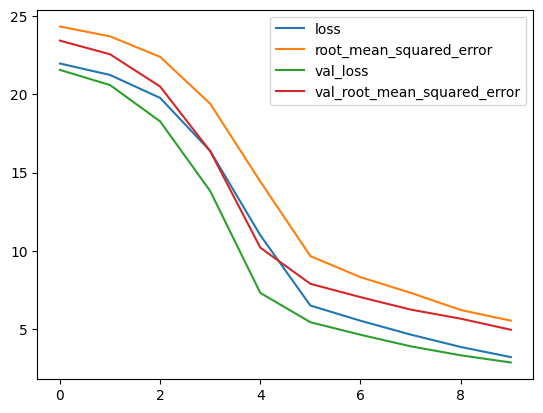

In [68]:
pd.DataFrame(history.history).plot()

## Saving and loading the model

In [69]:
model.save('custom_loss_model', save_format='tf')

INFO:tensorflow:Assets written to: custom_loss_model/assets


In [70]:
loaded_model=K.models.load_model('custom_loss_model')

In [73]:
loaded_model.loss

<function __main__.huber_fn(y_true, y_pred)>

In [79]:
# @tf.keras.utils.register_keras_serializable()
# Here we use smooth function gluing up to 1-st derivative 
# at threshold point

def create_huber(threshold=1.0):
    def huber_fn2(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    return huber_fn

### If this model was saved as above but with parametrized huber loss then we would need to explicitly specify custom loss parameter upon model load, like below

In [80]:
loaded_model2=K.models.load_model('custom_loss_model', 
                                 custom_objects={"huber_fn":create_huber(2.0)}) # Passing the parameter value

### This would show huber_fn2 if saved with it 

In [81]:
loaded_model2.loss

<function __main__.huber_fn(y_true, y_pred)>

### Solution to this is to create a full class instance for the custom loss, not just pass the funtion to model compile
### By implementing get_config() method API gets access to loss parameters

In [83]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
        
    def call(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'threshold':self.threshold}

In [84]:
hloss = HuberLoss(2.0)

In [85]:
hloss

In [86]:
hloss.threshold

2.0

In [89]:
hloss.reduction

'auto'

In [88]:
hloss.get_config()

{'reduction': 'auto', 'name': None, 'threshold': 2.0}

### Now this custom loss is to be compiled in:

In [91]:
# model.compile(loss=HuberLoss(2.), 
#             optimizer="nadam")

### While saving the model Keras calls the get_config() methods and stores config parameters in SavedModel format

### Upon restoring it from saved_model it suffices to just map custom object name to the HuberLoss class while the parameter is in the saved model

In [92]:
# model = tf.keras.models.load_model("saved_model_name",
#                                  custom_objects={"HuberLoss": HuberLoss})


In [93]:
cfg = hloss.get_config()

In [94]:
hloss2 = HuberLoss.from_config(cfg)

In [95]:
hloss2.get_config()

{'reduction': 'auto', 'name': None, 'threshold': 2.0}

# Custom: 
* Activation
* Initialization 
* Regularization
* Constraint

In [96]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

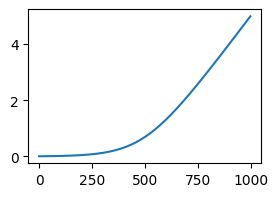

In [104]:
plt.figure(figsize=(3,2))
plt.plot(my_softplus([z/100 for z in range(-500, 500)]), 
         )

In [125]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2.0 / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev, dtype=dtype)

In [129]:
my_glorot_initializer((3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-1.0538235 ,  1.3410828 ,  0.23454776, -0.02660382],
       [ 0.4807642 ,  1.3381073 ,  1.0154651 , -0.8559572 ],
       [ 2.1010845 ,  1.1060486 ,  1.4183047 ,  1.055048  ]],
      dtype=float32)>

In [127]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

In [130]:
W = my_glorot_initializer((3, 4))

In [131]:
my_l1_regularizer(W)

<tf.Tensor: shape=(), dtype=float32, numpy=0.12783192>

In [132]:
def my_positive_weights(weigths):
    return tf.where(weigths < 0, 
                   tf.zeros_like(weigths),
                   weigths)

In [133]:
W

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-1.0095532 ,  1.8499558 ,  1.31533   ,  1.6051507 ],
       [-0.43115664,  0.78584415, -1.319988  ,  2.0059035 ],
       [-0.19896871,  0.1896115 , -0.23177671,  1.8399525 ]],
      dtype=float32)>

In [134]:
my_positive_weights(W)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.        , 1.8499558 , 1.31533   , 1.6051507 ],
       [0.        , 0.78584415, 0.        , 2.0059035 ],
       [0.        , 0.1896115 , 0.        , 1.8399525 ]], dtype=float32)>

# Using these custom elements:

In [135]:
layer = tf.keras.layers.Dense(1,
                             activation=my_softplus,
                             kernel_initializer=my_glorot_initializer,
                             kernel_constraint=my_positive_weights,
                             kernel_regularizer=my_l1_regularizer)

In [136]:
layer.get_config()

{'name': 'dense_9',
 'trainable': True,
 'dtype': 'float32',
 'units': 1,
 'activation': 'my_softplus',
 'use_bias': True,
 'kernel_initializer': 'my_glorot_initializer',
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': 'my_l1_regularizer',
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': 'my_positive_weights',
 'bias_constraint': None}

In [137]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        return {'factor': self.factor}
    

## Custom metrics

### Stateful object, streaming metric

In [138]:
precision = tf.keras.metrics.Precision()

In [139]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [140]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

## This object was updated upon consecutive calls, so contains an accumulated state value

In [141]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [143]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [144]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(sample_metrics), tf.float32))
        
    def result(self):
        return self.total / self.count
        
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

## Custom layers

### Weightless layer:

In [146]:
exp_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [155]:
xx = tf.constant([1.,2])

In [156]:
exp_layer(xx)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.7182817, 7.389056 ], dtype=float32)>

In [160]:
tf.keras.activations.get("relu")

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [164]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(name="kernel",
                                     shape=[batch_input_shape[-1], self.units],
                                     initializer="glorot_normal")
        
        self.bias = self.add_weight(name="bias",
                                    shape=[self.units],
                                    initializer="zeros")
        
        super().build()
        
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
               "units": self.units,
               "activation": tf.keras.activations.serialize(self.activation)}

In [171]:
mydense = MyDense(10, activation='relu')

In [172]:
mydense.get_config()

{'name': 'my_dense_1',
 'trainable': True,
 'dtype': 'float32',
 'units': 10,
 'activation': 'relu'}

### Multiple input - multiple output layers
### Only usable in functional and sunclassing API

In [ ]:
class MultiIOLayer(tf.keras.layers.Layer):
    ...
    def call(self, X):
        X1, X2 = X
        ...
        return X1 + X2, X1 * X2, X1 / X3

### Layer with different bhv during training and inference

In [173]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super.__init__(**kwargs)
        self.stddev = stddev
        
    def call(self, X, training=False):
        if training:
            noise = tf.random.normal(tf.shape(X),
                                    stddev=self.stddev)
            return X + noise
        
        else:
            return X

## Custom models

In [245]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons,
                                            activation='relu',
                                            kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs +Z

In [250]:
blk = ResidualBlock(2, 10)

In [251]:
blk.build(input_shape=[10,10])

In [252]:
blk.trainable_variables

[]

In [253]:
blk.weights

[]

In [254]:
xx=tf.constant([1.,2,3,4,5,6,7,8,9,0])

In [255]:
xx=xx[tf.newaxis]

In [256]:
blk(xx)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[17.312511 ,  2.       ,  3.       ,  5.0260854,  7.0659685,
         6.7375607,  7.       ,  8.       , 12.91092  ,  4.8243475]],
      dtype=float32)>

### Had to use the layer to get weights initialized

In [257]:
blk.get_weights()

[array([[-0.43571636, -0.31297022,  0.3924466 ,  0.8052514 ,  0.04544719,
         -0.17202644, -0.37882566,  0.08245353,  0.38932934,  0.10699701],
        [ 0.00975093, -0.02376715,  0.32439965, -0.6139281 ,  0.24642757,
         -0.02140461,  0.28661647,  0.1720161 ,  0.76532114, -0.66626304],
        [-0.9289929 ,  0.47729078,  0.5850858 ,  0.6317652 ,  0.03407048,
          0.8678941 ,  0.4151808 ,  0.4391615 , -0.07137261,  0.97668976],
        [-0.9040229 , -0.58185077, -0.8239951 , -0.6761341 ,  0.49670568,
         -0.03538411,  0.16086958,  0.33090144, -0.2993837 ,  0.5395365 ],
        [-0.02917822,  1.0160731 ,  0.61371374,  0.24175017, -0.45135313,
         -0.5880755 ,  0.61995596,  0.54211175,  0.05185533, -0.49571   ],
        [-0.6349367 , -0.01597433,  0.70319617, -0.25709078, -0.7373688 ,
         -0.99810874, -0.01479304, -0.13184628,  0.00514823, -0.25737554],
        [-0.6612635 , -0.3731469 ,  0.14900492, -0.56469065, -0.8029324 ,
          0.715193  ,  0.5579964

In [258]:
blk.trainable_variables

[<tf.Variable 'residual_block_8/dense_26/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.43571636, -0.31297022,  0.3924466 ,  0.8052514 ,  0.04544719,
         -0.17202644, -0.37882566,  0.08245353,  0.38932934,  0.10699701],
        [ 0.00975093, -0.02376715,  0.32439965, -0.6139281 ,  0.24642757,
         -0.02140461,  0.28661647,  0.1720161 ,  0.76532114, -0.66626304],
        [-0.9289929 ,  0.47729078,  0.5850858 ,  0.6317652 ,  0.03407048,
          0.8678941 ,  0.4151808 ,  0.4391615 , -0.07137261,  0.97668976],
        [-0.9040229 , -0.58185077, -0.8239951 , -0.6761341 ,  0.49670568,
         -0.03538411,  0.16086958,  0.33090144, -0.2993837 ,  0.5395365 ],
        [-0.02917822,  1.0160731 ,  0.61371374,  0.24175017, -0.45135313,
         -0.5880755 ,  0.61995596,  0.54211175,  0.05185533, -0.49571   ],
        [-0.6349367 , -0.01597433,  0.70319617, -0.25709078, -0.7373688 ,
         -0.99810874, -0.01479304, -0.13184628,  0.00514823, -0.25737554],
        [-0.661263

In [259]:
blk.submodules

(<keras.layers.core.dense.Dense at 0x7f8d20dd5190>,
 <keras.layers.core.dense.Dense at 0x7f8d20dd5070>)

In [260]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(1,
                                            activation='relu',
                                            kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)
        
    def call(self, inputs):
        Z = self.hidden1(inputs)
        
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [261]:
resnet = ResidualRegressor(1)

## Model extends Layer with additional methods, including:
* ### compile(), fit(), evaluate(), predict()
* ### get_layer(), save() (for load_model() and clone_model())
* ### and save_weights(), load_weights()
* ### Additional losses and metrics can be added with 
* ### add_loss(), add_metric()

# Losses and metrics based on model internals

### Reconstruction loss is a form of regularization forcing the model to retain as much information on the input data as possible

In [264]:
class ReconstructingRgressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30,
                                            activation='relu',
                                            kernel_initializer='he_normal')
                      for _ in range(5)]
        
        self.out = tf.keras.layers.Dense(output_dim)
        # This will be a streaming metric updated on the go
        self.reconstruction_mean = tf.keras.metrics.Mean(
            name='reconstruction_error')

    # Reconstruction layer is build only when the shape
    # of the input data is known
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
            
    def call(self, inputs, training=False):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(inputs - reconstruction))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            seld.add_metric(result)
        return self.out(Z)